# MECH 420 Lab Report #1

## Kyle Ah Von #57862609

This lab report will answer the questions related to the **analysis** portion of the lab manual for distance sensors. 

I am starting with setting up the environment before running any analysis.

In [45]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

# Setup Dataframes
Al_shinydataset = pd.read_excel("ShinyAluminumSlower.xlsx", skiprows = 1)
Al_sanddataset = pd.read_excel("Sandblastedaluminum.xlsx", skiprows = 1)
Steeldataset = pd.read_excel("SteelSampleSlower.xlsx", skiprows = 1)
Acrylicdataset = pd.read_excel("AcrylicSample.xlsx", skiprows = 1)

# Remove duplicate data points
Al_shinydataset = Al_shinydataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Al_sanddataset = Al_sanddataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Steeldataset = Steeldataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Acrylicdataset = Acrylicdataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])

## Question 1
Prepare one graph for each proximity sensor showing the sensor signal for all test targets as a function of distance between the sensor and the test targets. Use the distance measured by the dial gauge as the reference distance.

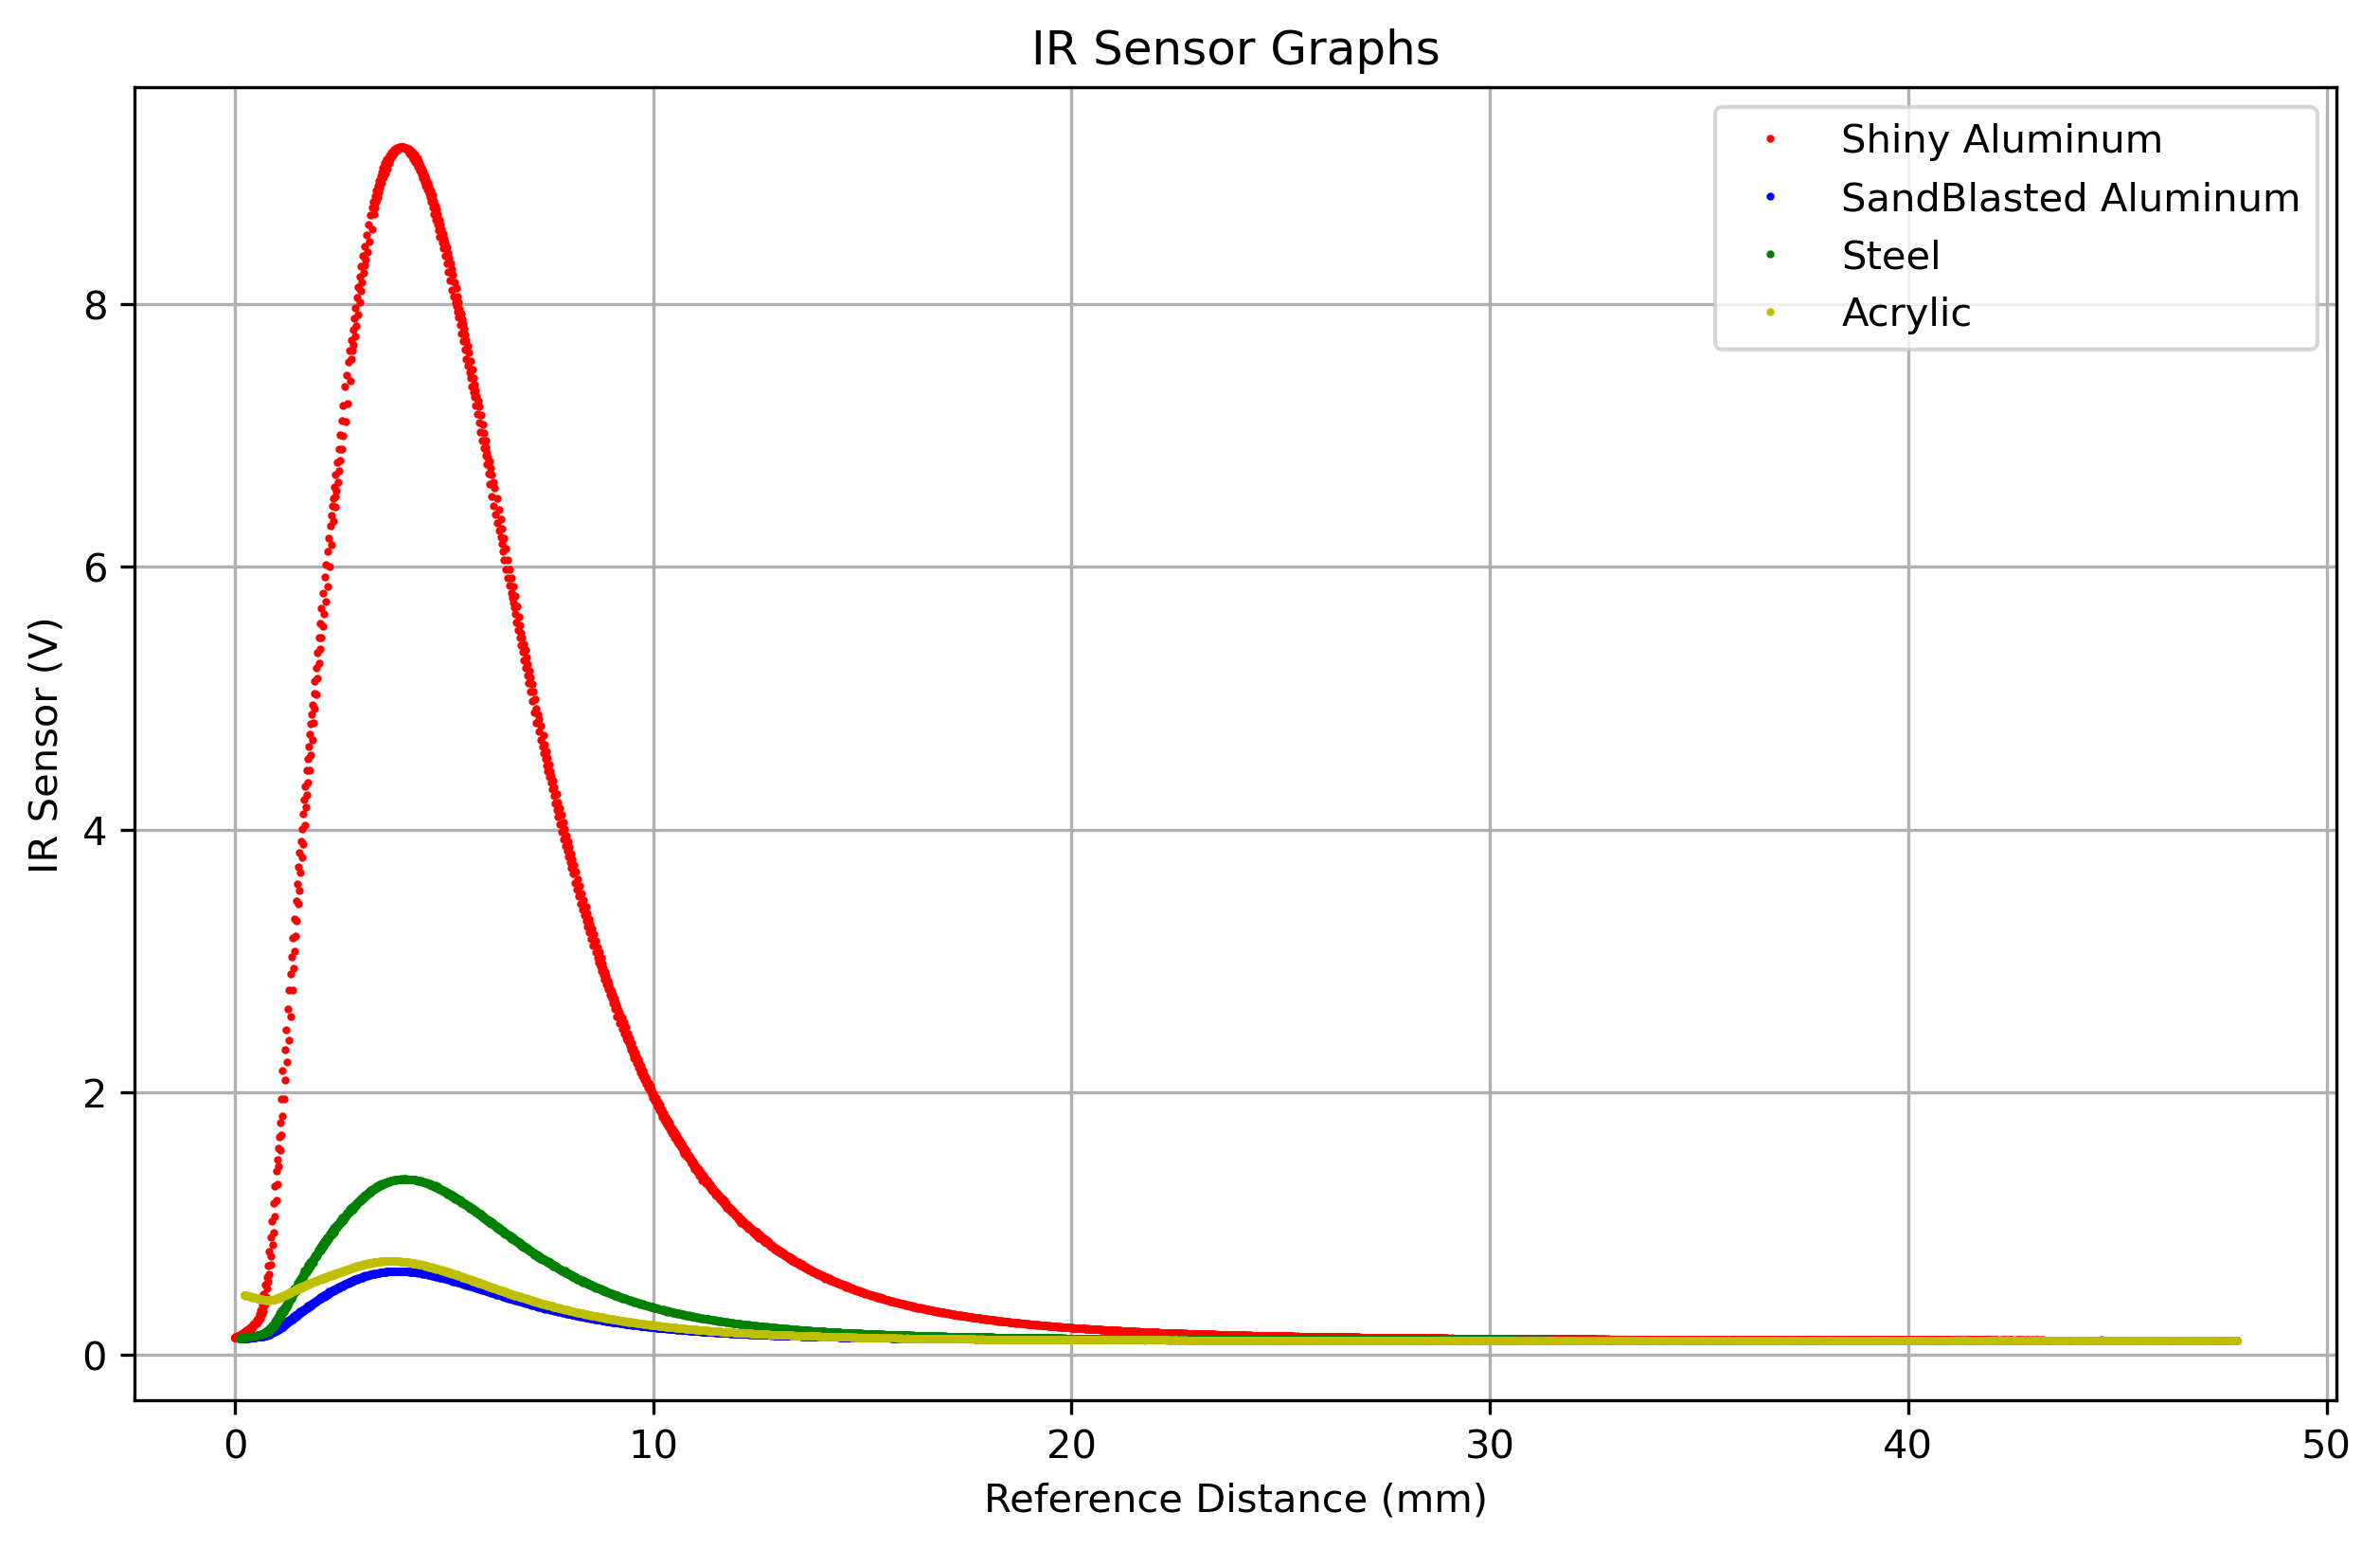

In [46]:
##IR Sensor Graphs
# Plotting large data efficiently
plt.figure(figsize=(10,6), dpi = 300)
plt.plot(Al_shinydataset['Reference Distance (mm)'], Al_shinydataset['IR Sensor (V)'], 'o', color = 'r', markersize = 1, label = 'Shiny Aluminum')  
plt.plot(Al_sanddataset['Reference Distance (mm)'], Al_sanddataset['IR Sensor (V)'], 'o', color = 'b', markersize = 1, label = 'SandBlasted Aluminum')  
plt.plot(Steeldataset['Reference Distance (mm)'], Steeldataset['IR Sensor (V)'], 'o', color = 'g', markersize = 1, label = 'Steel')  
plt.plot(Acrylicdataset['Reference Distance (mm)'], Acrylicdataset['IR Sensor (V)'], 'o', color = 'y', markersize = 1, label = 'Acrylic')  
plt.xlabel('Reference Distance (mm)')
plt.ylabel('IR Sensor (V)')
plt.title('IR Sensor Graphs')
plt.grid(True)
plt.legend()
plt.show()


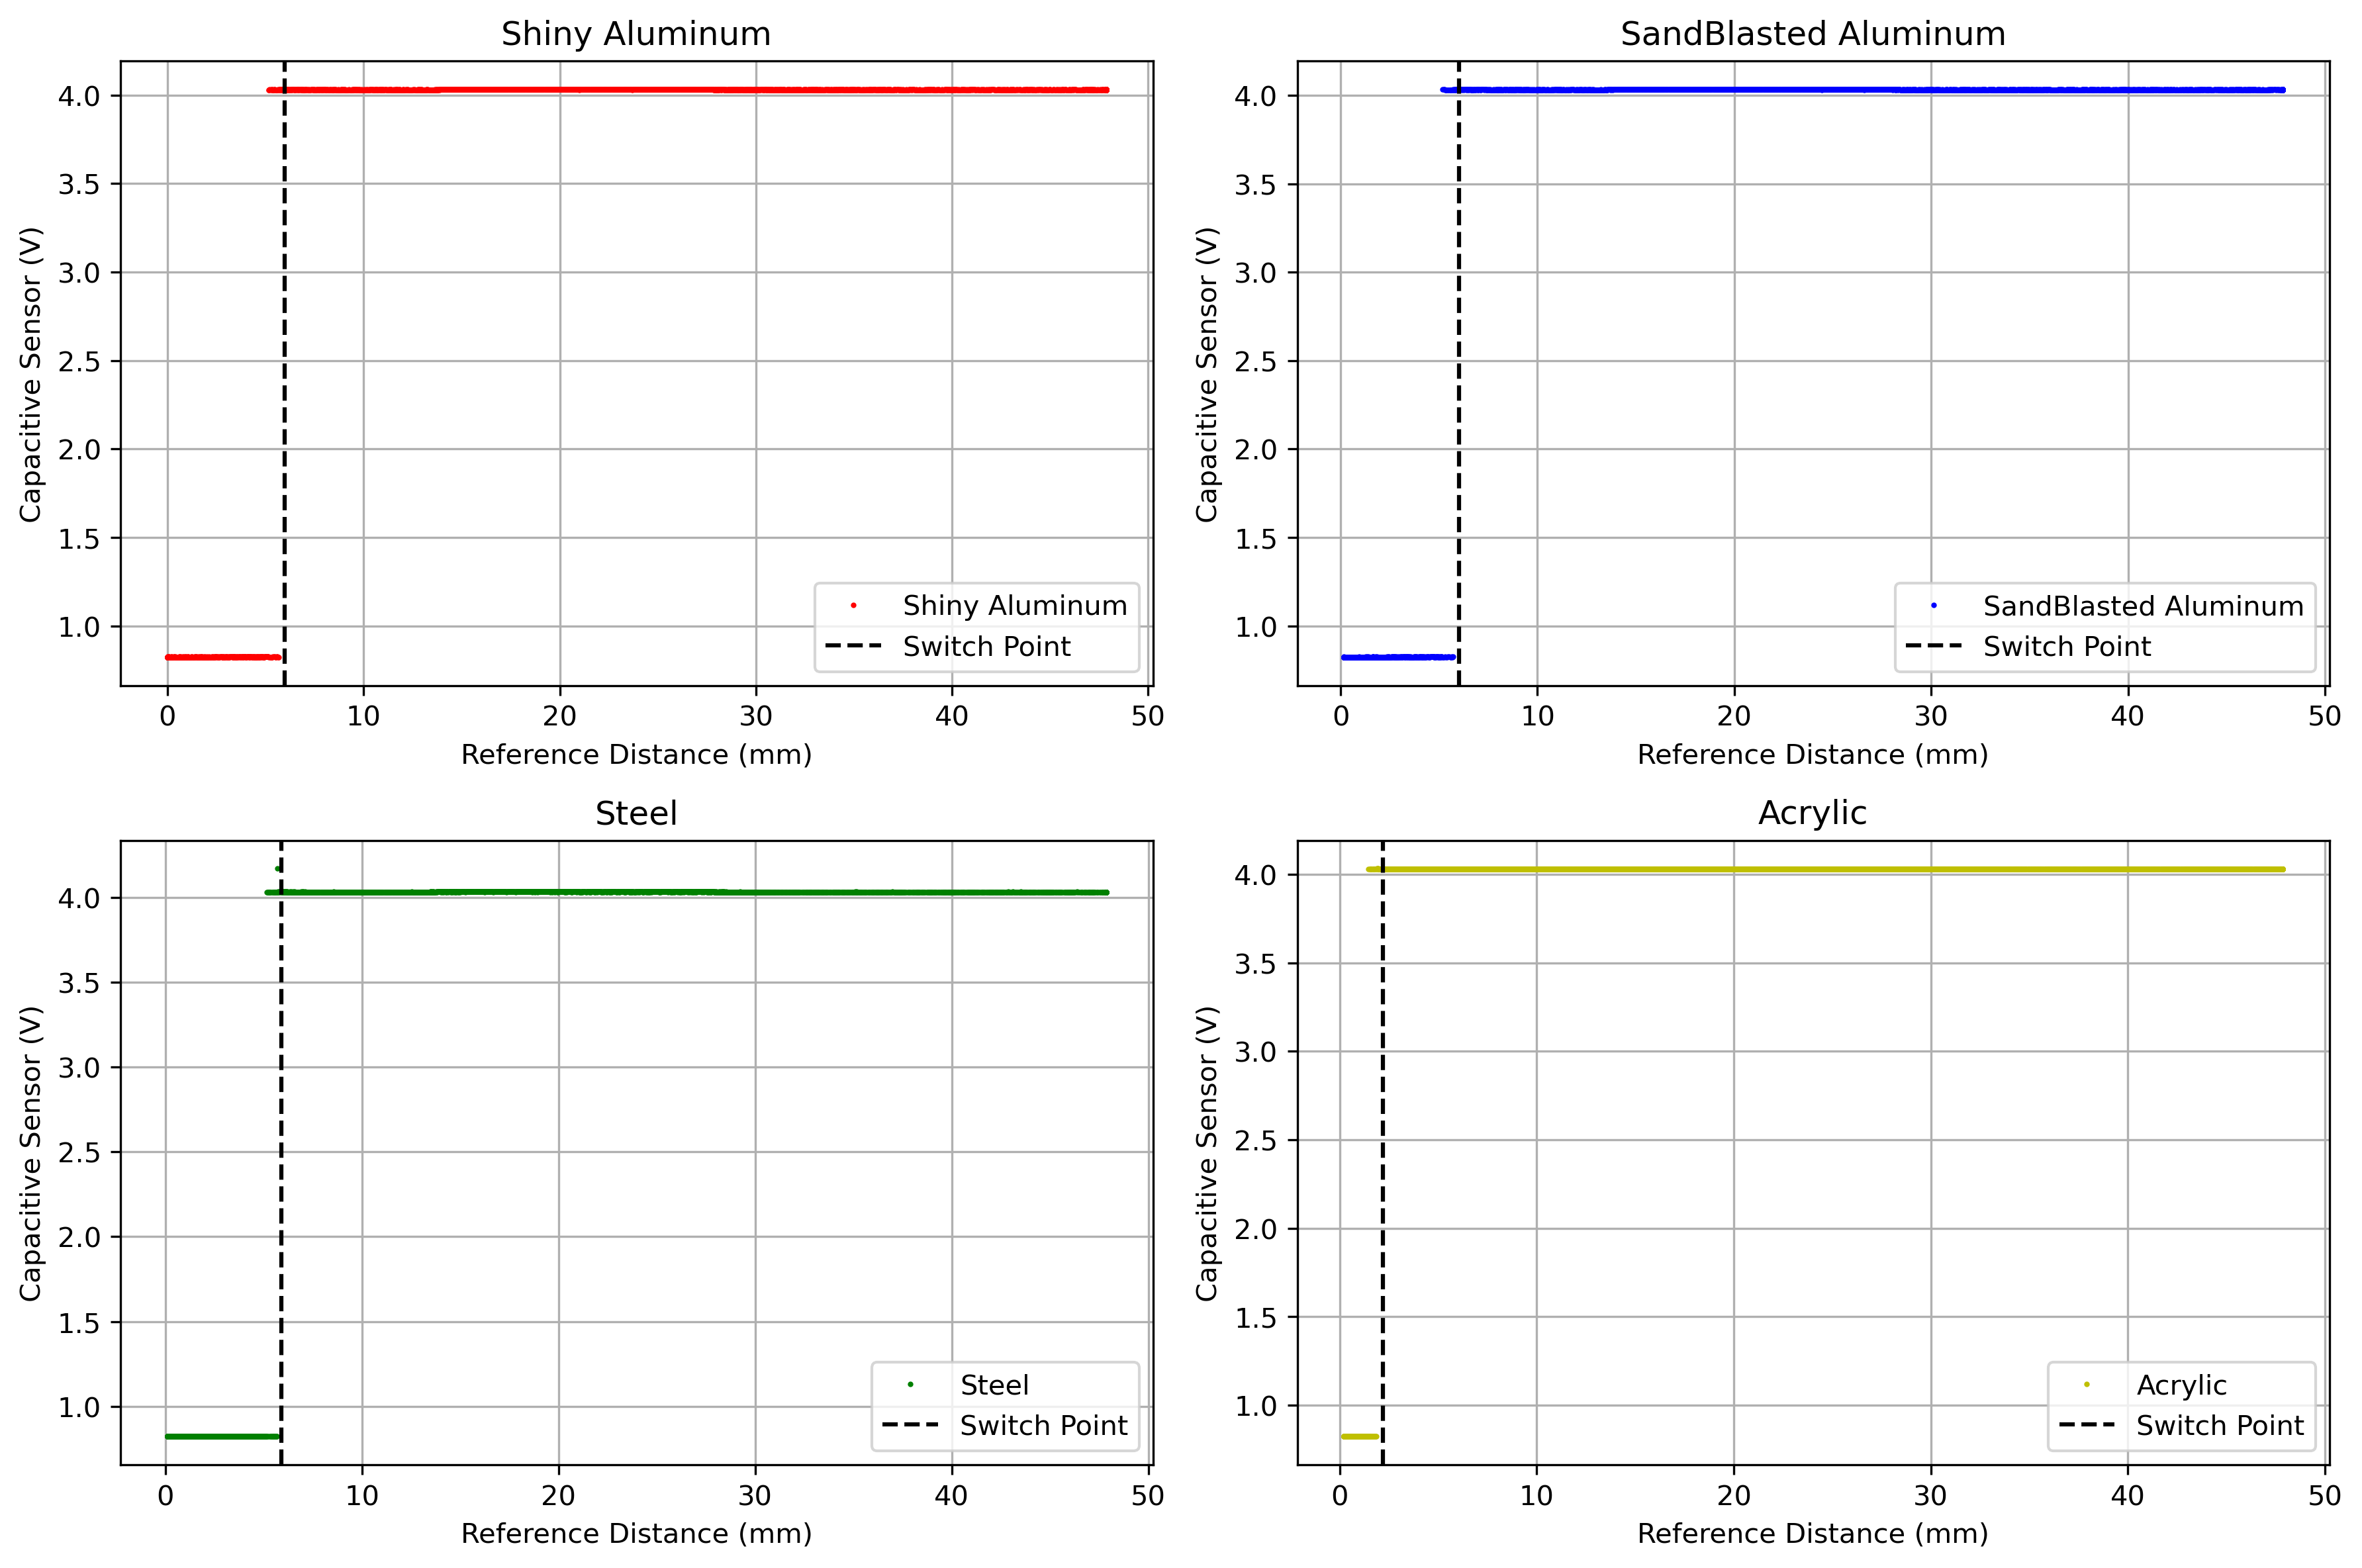

In [59]:
##Capacitive Sensor
# Define the threshold for the switch (this is an example; adjust based on your data)
threshold = 4.0  # Example threshold for switching from low to high

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Function to plot with vertical line
def plot_with_switch(ax, x_data, y_data, title, color, label):
    ax.plot(x_data, y_data, 'o', color=color, markersize=1, label=label)
    ax.set_title(title)
    ax.set_xlabel('Reference Distance (mm)')
    ax.set_ylabel('Capacitive Sensor (V)')
    
    # Find the index where the sensor value crosses the threshold
    switch_index = y_data.idxmax()  # Gets the first occurrence where it goes below threshold
    switch_value = x_data.iloc[switch_index]  # Get the corresponding x value
    
    # Add a vertical line at the switch value
    ax.axvline(switch_value, color='k', linestyle='--', label='Switch Point')

    ax.grid(True)
    ax.legend()

# Plot for Shiny Aluminum
plot_with_switch(axs[0, 0], Al_shinydataset['Reference Distance (mm)'], Al_shinydataset['Capacitive Sensor (V)'], 'Shiny Aluminum', 'r', 'Shiny Aluminum')

# Plot for SandBlasted Aluminum
plot_with_switch(axs[0, 1], Al_sanddataset['Reference Distance (mm)'], Al_sanddataset['Capacitive Sensor (V)'], 'SandBlasted Aluminum', 'b', 'SandBlasted Aluminum')

# Plot for Steel
plot_with_switch(axs[1, 0], Steeldataset['Reference Distance (mm)'], Steeldataset['Capacitive Sensor (V)'], 'Steel', 'g', 'Steel')

# Plot for Acrylic
plot_with_switch(axs[1, 1], Acrylicdataset['Reference Distance (mm)'], Acrylicdataset['Capacitive Sensor (V)'], 'Acrylic', 'y', 'Acrylic')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()




